<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Week3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [47]:
import pandas as pd
import numpy as np
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
# Split
from sklearn.model_selection import train_test_split
# Mutual information
from sklearn.metrics import mutual_info_score 
# One-hot encoding
from sklearn.feature_extraction import DictVectorizer
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Accuracy / error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Ridge Regression
from sklearn.linear_model import Ridge

# Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Features

For the rest of the homework, you'll need to use only these columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value',
- 'ocean_proximity',

In [4]:
df.shape

(20640, 10)

In [5]:
df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']].shape

(20640, 10)

We already have these columns only.

# Data preparation
- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
- Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

## Select only the features from above and fill in the missing values with 0.

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

> We have 207 missing values in `total_bedrooms`

In [7]:
# Fill missing values with 0
df.fillna(0, inplace=True)

## Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.

In [8]:
df['rooms_per_household'] = df.total_rooms / df.households 

## Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.

In [9]:
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms 

## Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [10]:
df['population_per_household'] = df.population / df.households

# Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:

- `NEAR BAY`
- `<1H OCEAN`
- `INLAND`
- `NEAR OCEAN`

In [11]:
df.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

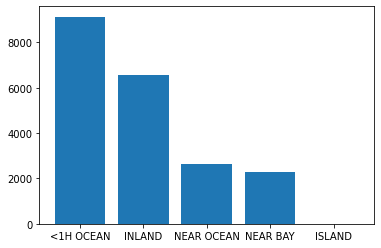

In [12]:
plt.bar(df.ocean_proximity.value_counts().index, df.ocean_proximity.value_counts().values);

> **Answer:** <br/>
`<1H OCEAN`

# Question 2
- Create the correlation matrix for the numerical features of your train dataset.
  - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

In [13]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [14]:
# Get numerical features
numerical_features = list(df.select_dtypes([np.number]).columns)
numerical_features.remove('median_house_value')
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [15]:
# Numerical df
df_numeric = df.copy()
df_numeric = df[numerical_features]

In [16]:
df_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


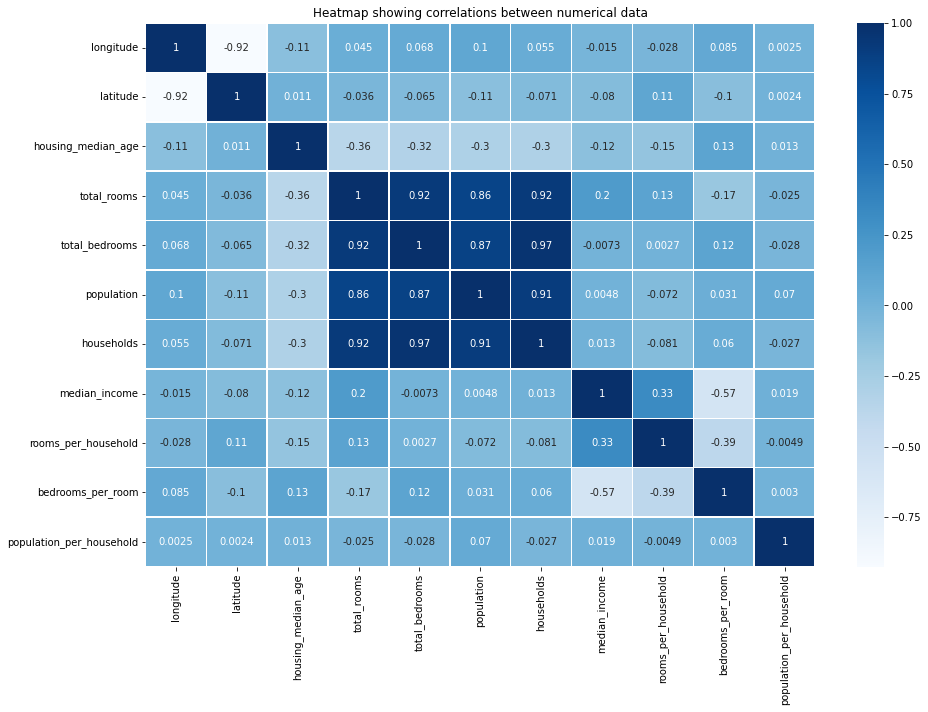

In [17]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.5, cmap='Blues')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [18]:
df_numeric.corr().unstack().sort_values(ascending=False)

longitude            longitude              1.000000
latitude             latitude               1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_income        median_income          1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.387465
bedrooms_per_room    median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
longitude            latitude              -0.924664
latitude             longitude             -0.924664
Length: 121, dtype: float64

Remove the 1s and get the top 15 highest correlations:

In [19]:
corr = df_numeric.corr() 
corr[corr !=1].unstack().sort_values(ascending=False)[:15]

total_bedrooms       households             0.966507
households           total_bedrooms         0.966507
total_bedrooms       total_rooms            0.920196
total_rooms          total_bedrooms         0.920196
                     households             0.918484
households           total_rooms            0.918484
population           households             0.907222
households           population             0.907222
population           total_bedrooms         0.866266
total_bedrooms       population             0.866266
population           total_rooms            0.857126
total_rooms          population             0.857126
rooms_per_household  median_income          0.326895
median_income        rooms_per_household    0.326895
total_rooms          median_income          0.198050
dtype: float64

> **Answer:** <br/>
`total_bedrooms` and `households`

# Make `median_house_value` binary
- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is 1 if the `median_house_value` is above its mean value and 0 otherwise.

In [20]:
house_value_mean = df.median_house_value.mean()
house_value_mean 

206855.81690891474

In [21]:
df['above_average'] = (df['median_house_value'] > house_value_mean).astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


# Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [22]:
# Drop median house value, since we will use it as `above_average`
df = df.drop('median_house_value', axis=1)

In [23]:
# Split data
df_train, df_excess = train_test_split(df, train_size=0.6, random_state=42)

df_val, df_test = train_test_split(df_excess, train_size=0.5, random_state=42)

In [24]:
df_train.shape, df_val.shape, df_test.shape 

((12384, 13), (4128, 13), (4128, 13))

In [25]:
# Target variable
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

# Question 3
- Calculate the mutual information score between `above_average` and `ocean_proximity`. Use the training set only.
- Round it to 2 decimals using round(score, 2)
- What is their mutual information score?

Options:

- 0.26
- 0
- 0.10
- 0.16

In [26]:
score = mutual_info_score(df_train['above_average'], df_train['ocean_proximity'])
print(score, round(score, 2))

0.10266844079906365 0.1


> **Answer:** <br/>
0.10

In [27]:
# Drop target class
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

# Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- 0.60
- 0.72
- 0.84
- 0.95

## One-hot encoding for `ocean_proximity`

In [28]:
# Turn train data to dict
dict_train = df_train.to_dict(orient='records')

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
# Fit and transform
X_train = dv.fit_transform(dict_train)

In [31]:
# Feature names
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

## Fit the model on the training dataset

In [32]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [33]:
model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
X_train.shape, y_train.shape

((12384, 16), (12384,))

## Calculate accuracy on validation set

In [35]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

score = accuracy_score(y_val, y_pred)
print(np.round(score,2))

0.83


> **Answer:** <br/>
~= 0.84

# Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
  - `total_rooms`
  - `total_bedrooms`
  - `population`
  - `households`

>Note: the difference doesn't have to be positive

In [36]:
features = ['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [37]:
diff_least = 1

for feature in features:
  new_features = features.copy()
  new_features.remove(feature)

  train_dict = df_train[new_features].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(train_dict)

  model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
  model.fit(X_train, y_train) 

  val_dict = df_val[new_features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict(X_val)

  new_score = accuracy_score(y_val, y_pred)

  diff = abs(score - new_score)
  if diff<diff_least:
    diff_least = diff
    feature_least = feature

  print(f'{feature},      {diff},      {new_score}')
  print('-----------------------------------------------------------------------')

print(f'Feature {feature_least} has the least difference of {diff_least}')

bedrooms_per_room,      0.0002422480620154488,      0.8275193798449613
-----------------------------------------------------------------------
households,      0.004602713178294526,      0.8231589147286822
-----------------------------------------------------------------------
housing_median_age,      0.006056201550387552,      0.8217054263565892
-----------------------------------------------------------------------
latitude,      0.0031492248062015005,      0.8246124031007752
-----------------------------------------------------------------------
longitude,      0.0004844961240310086,      0.8272771317829457
-----------------------------------------------------------------------
median_income,      0.04093992248062017,      0.7868217054263565
-----------------------------------------------------------------------
ocean_proximity,      0.017926356589147208,      0.8098352713178295
-----------------------------------------------------------------------
population,      0.00968992248062

> **Answer:** <br/>
`total_bedrooms` 

# Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
- This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest `alpha`.

Options:

- 0
- 0.01
- 0.1
- 1
- 10

In [44]:
dict_train = df_train.to_dict(orient='records')

In [45]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [49]:
for a in [0, 0.01, 0.1, 1, 10]:
  model = Ridge(alpha=a, solver="sag", random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  
  score = np.sqrt(mean_squared_error(y_val, y_pred))
  
  print(a, round(score, 4))

0 0.4727
0.01 0.4727
0.1 0.4727
1 0.4727
10 0.4727


> **Answer:** <br/>
0